In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import json
import os
import csv
import urllib2
%pylab inline

from __future__ import print_function
__author__='djc'

url = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
s = json.load(url)
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/Users/Daynan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#CITIBIKE EXPLORATION
#OCTOBER 2015

####IDEA: People use Citibike to commute across town in Manhattan where public transit is lacking because there are no trains or trains are hard to get to and/or bus routes are congested.

####HYPOTHESIS: Key crosstown streets are more likely to have Citibike trips that start and stop along the same street than avenues with train lines are.

####TESTABLE HYPOTHESIS: The ratio of Citibike trips that start along a key crosstown street and end at another station on the same street vs. all trips that start on that street is greater than the ratio of trips that start along a key avenue with a train line and end at another station on the same street vs all trips that start on that street.

###NULL HYPOTHESIS: The ratio of Citibike trips that start along a key crosstown street and end at another station on the same street vs all trips that start on that street is the same or smaller than the ratio of trips that start along key avenues with train lines and end at another station on the same street vs all trips that start on that street. With a significance level alpha = 0.05

####Informal parameters: This is exploratory, focused only on trips that start in Midtown Manhattan and comparing only along key crosstown streets and key North/South Avenues.

[INSERT PHOTO OF MAP]

###Key crosstown streets sample: 14th, 23rd, 34th, 42nd, 59th
Selected bc these streets are all primary East-West arteries. They have no trains, or no trains that extend all the way (such as L on 14th and 7 on 42nd). While crosstown bus routes were meant to link up with uptown/downtown train stations on these streets, these bus routes are highly congested.

###Key avenues with trains sample: 8th, 7th, 6th, Broadway, Lex/Park
Selected bc these streets are all primary Uptown/Downtown arteries that have train lines running along them (A,C,E along 8th, 1,2,3 along 7th, B,D,F,M along 6th, N,Q,R along Broadway, 4,5,6 along Lex/Park.) 

Sample station selection method: Using a Citibike map, stations that are visually identified to be within a block of the key street in the sample are included in that street's station set.

Using the most recently published Citibike trip data: August 2015

In [2]:
# Consider pulling URL from Git 
df = pd.read_csv("201508-citibike-tripdata.csv")

In [3]:
# create dictionaries for 2 samples from CSV of stations
xtown = {}
ave = {}
with open('stations.csv', 'r') as inFile:
    reader = csv.reader(inFile)
    for row in reader:
        key = row[0]
        if row[1] == 'xtown':
            xtown[key] = row[2:]
        if row[1] == 'ave':
            ave[key] = row[2:]

# clean out empty elements
for n in xtown:
    xtown[n] = filter(None, xtown[n])
for n in ave:
    ave[n] = filter(None, ave[n])

In [4]:
# create lists of all trips starting at each street
start_14 = []
start_23 = []
start_34 = []
start_42 = []
start_59 = []
start_6 = []
start_7 = []
start_8 = []
start_bway = []
start_lex = []

for index, row in df.iterrows():
    if str(row['start station id']) in xtown['14']:
        start_14.append([row['start station name'], row['start station id'], row[
                        'end station name'], row['end station id']])
    if str(row['start station id']) in xtown['23']:
        start_23.append([row['start station name'], row['start station id'], row[
                        'end station name'], row['end station id']])
    if str(row['start station id']) in xtown['34']:
        start_34.append([row['start station name'], row['start station id'], row[
                        'end station name'], row['end station id']])
    if str(row['start station id']) in xtown['42']:
        start_42.append([row['start station name'], row['start station id'], row[
                        'end station name'], row['end station id']])
    if str(row['start station id']) in xtown['59']:
        start_59.append([row['start station name'], row['start station id'], row[
                        'end station name'], row['end station id']])
    if str(row['start station id']) in ave['6']:
        start_6.append([row['start station name'], row['start station id'], row[
                       'end station name'], row['end station id']])
    if str(row['start station id']) in ave['7']:
        start_7.append([row['start station name'], row['start station id'], row[
                       'end station name'], row['end station id']])
    if str(row['start station id']) in ave['8']:
        start_8.append([row['start station name'], row['start station id'], row[
                       'end station name'], row['end station id']])
    if str(row['start station id']) in ave['bway']:
        start_bway.append([row['start station name'], row['start station id'], row[
                          'end station name'], row['end station id']])
    if str(row['start station id']) in ave['lex']:
        start_lex.append([row['start station name'], row['start station id'], row[
                         'end station name'], row['end station id']])

In [5]:
# create lists of trips that start and stopped on same street
end_14 = []
for i in start_14:
    if (i[1]) != (i[3]) and str(i[3]) in xtown['14']:
        end_14.append(i)
        
end_23 = []
for i in start_23:
    if (i[1]) != (i[3]) and str(i[3]) in xtown['23']:
        end_23.append(i)

end_34 = []
for i in start_34:
    if (i[1]) != (i[3]) and str(i[3]) in xtown['34']:
        end_34.append(i)

end_42 = []
for i in start_42:
    if (i[1]) != (i[3]) and str(i[3]) in xtown['42']:
        end_42.append(i)

end_59 = []
for i in start_59:
    if (i[1]) != (i[3]) and str(i[3]) in xtown['59']:
        end_59.append(i)

end_8 = []
for i in start_8:
    if (i[1]) != (i[3]) and str(i[3]) in ave['8']:
        end_8.append(i)
        
end_7 = []
for i in start_7:
    if (i[1]) != (i[3]) and str(i[3]) in ave['7']:
        end_7.append(i)
        
end_6 = []
for i in start_6:
    if (i[1]) != (i[3]) and str(i[3]) in ave['6']:
        end_6.append(i)
        
end_bway = []
for i in start_bway:
    if (i[1]) != (i[3]) and str(i[3]) in ave['bway']:
        end_bway.append(i)
        
end_lex = []
for i in start_lex:
    if (i[1]) != (i[3]) and str(i[3]) in ave['lex']:
        end_lex.append(i)

In [6]:
all_x = [len(start_14), len(start_23), len(
    start_34), len(start_42), len(start_59)]
end_x = [len(end_14), len(end_23), len(end_34), len(end_42), len(end_59)]
all_ave = [len(start_8), len(start_7), len(
    start_6), len(start_bway), len(start_lex)]
end_ave = [len(end_8), len(end_7), len(end_6), len(end_bway), len(end_lex)]
street_ratio = [float(e)/float(a)
                for e, a in zip(end_x+end_ave, all_x+all_ave)]

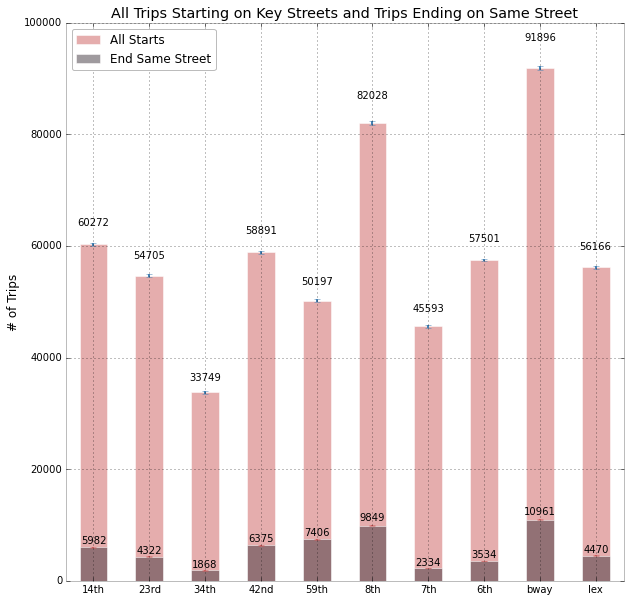

In [10]:
# create bar graph to visually compare the start-and-end trips with all
# trips for each street

fig = pl.figure(figsize(10,10))
N = 10

ind = np.arange(N)
width = 0.5


# counts follow a Poisson statistic, so calculate the error
error_all = np.sqrt(all_x+all_ave)
error_end = np.sqrt(end_x+end_ave)

fig, ax = pl.subplots()
all_starts = ax.bar(ind+width/2, all_x+all_ave, width,
                    color='IndianRed', alpha=0.5, yerr=[error_all, error_all])
all_end = ax.bar(ind+width/2, end_x+end_ave, width,
                 color="#41373F", alpha=0.5, yerr=[error_end, error_end])

ax.set_ylabel('# of Trips')
ax.set_title(
    'All Trips Starting on Key Streets and Trips Ending on Same Street')
ax.set_xticks(ind+width)
ax.set_xticklabels(
    ('14th', '23rd', '34th', '42nd', '59th', '8th', "7th", "6th", "bway", "lex"))

ax.legend((all_starts[0], all_end[0]),
          ('All Starts', 'End Same Street'), loc=2)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d' % int(height),
                ha='center', va='bottom')

autolabel(all_starts)
autolabel(all_end)

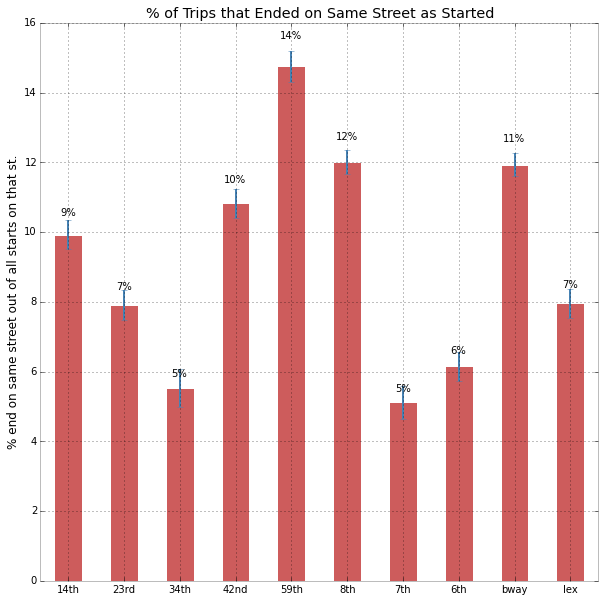

In [13]:
# create a bar graph of the ratios
fig, ax = pl.subplots()
ratio_plot = ax.bar(ind+width/2, [a*100 for a in street_ratio], width, color='IndianRed', yerr=[
                    [p*100 for p in error_all/(all_x+all_ave)], [p*100 for p in error_all/(all_x+all_ave)]])

# add some text for labels, title and axes ticks
ax.set_ylabel('% end on same street out of all starts on that st.')
ax.set_title('% of Trips that Ended on Same Street as Started')
ax.set_xticks(ind+width)
ax.set_xticklabels(
    ('14th', '23rd', '34th', '42nd', '59th', '8th', "7th", "6th", "bway", "lex"))

#ax.legend( (all_starts[0], all_end[0]), ('All Starts', 'End Same Street'),loc=2 )


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d%%' % int(height),
                ha='center', va='bottom')

autolabel(ratio_plot)

Crosstown ratio start-end/all: 0.100665596127, error: 0.00438232649456
Avenue ratio start-end/all: 0.093485881675, error: 0.00384130493612


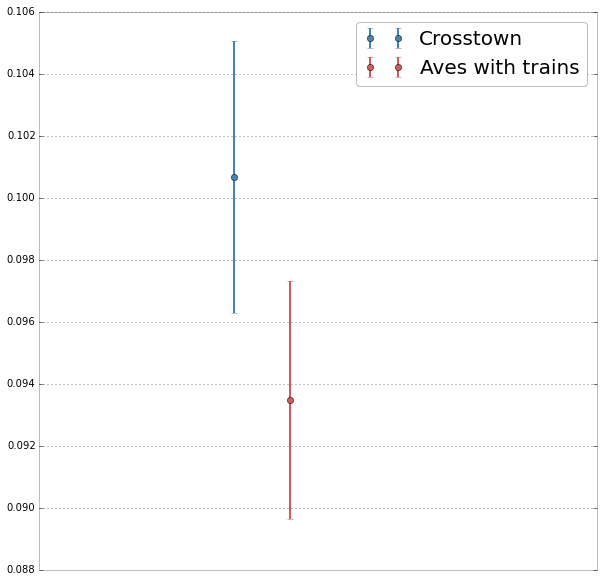

In [14]:
fig = pl.figure(figsize(10, 10))
ax = fig.add_subplot(111)
ax.set_xticks([])

x_town_ratio = sum(end_x)*1.0/sum(all_x)*1.0
x_town_error = np.sqrt(sum(np.sqrt(all_x))**2)*1.0/sum(all_x)*1.0

ave_ratio = sum(end_ave)*1.0/sum(all_ave)*1.0
ave_error = np.sqrt(sum(np.sqrt(all_ave))**2)*1.0/sum(all_ave)*1.0

print("Crosstown ratio start-end/all: {}, error: {}\nAvenue ratio start-end/all: {}, error: {}".format(
    x_town_ratio, x_town_error, ave_ratio, ave_error))
ax.errorbar(
    [0.2], [x_town_ratio], yerr=[x_town_error], fmt='o', label='Crosstown')
ax.errorbar([0.4], [ave_ratio], yerr=[ave_error],
            fmt='o', label='Aves with trains')
ax.set_xlim(0, 0.5)

pl.xlim(-0.5, 1.5)
pl.legend(fontsize=20)

In [15]:
print (x_town_ratio-ave_ratio)

0.00717971445245


####Yes, the ratio of trips that start and end on the same street vs all trips starting on the street is higher for crosstown streets than the avenues with train lines. In other words, it is NOT the same or lower as the null hypothesis states.

####But is it statistically significant in order to reject the null hypothesis at alpha=0.05? The slightly overlapping error bars indicates it is not, but let's conduct a test anyway.

####I have a few assumptions that allow me to procees with a parametric method: The two-proportion z-test
Assumptions are:
- They are large sample sizes, allowing me to assume normal distribution (binomial approximates to Gaussian).
- This is a test of categorical data in the independent and dependent variables (cross town or ave street, same street trip or not), essentially making it a test of proportions.
- I'm assuming similar variance for the samples.
- The data represent unique bike trips from unique sets of stations and are thetherefore assumed to be independent samples. One caveat: a small number of stations are at intersections of crossstreets and avenues and there are in both data sets. I believe this is a small enough number to proceed as if the samples are independent, but this should be noted.

NULL: H0: P0(crosstown ratio) <= P1(ave ratio) or P0-P1<=0

H1: P0 > P1  or P0-P1 > 0

This will therefore be a one-tailed test.

In [16]:
# find the standard deviation for pooled samples
P0 = float(sum(end_x))/float(sum(all_x))
P1 = float(sum(end_ave))/float(sum(all_ave))

st_dev = lambda p, n: np.sqrt(p*(1-p)/n[0]+p*(1-p)/n[1])
sample_st_dev = st_dev(float(sum(end_x)+sum(end_ave)) /
                       float(sum(all_x)+sum(all_ave)), [float(sum(all_x)), float(sum(all_ave))])
print(P0, sum(all_x), sum(all_ave), sample_st_dev)

0.100665596127 257814 333184 0.000774929643428


In [17]:
zscore = lambda p0, p1, s : (p0-p1)/s
z = zscore(P0,P1,sample_st_dev)
print (z)

9.26498878103


In [19]:
# we see that z score is higher than largest on table for a one-tailed test, so we set P=0.0002

p_value=1-0.0002
alpha = 0.05

def report_result(p,a):
    print ('Is the p value {0:.4f} smaller than the critical value {1:.4f}? '.format(p,a))
    if p<a:
        print ("YES")
    else: print ("NO")
    
    print ('The Null hypothesis is {}.'.format( 'rejected' if p<a  else 'not rejected')) 

    
report_result(p_value,alpha)

Is the p value 0.9998 smaller than the critical value 0.0500? 
NO
The Null hypothesis is not rejected.


##As predicted by looking at the graph with error bars, while the ratio of crosstown trips that start and end on the same street / total trips starting on the street is indeed higher than the ratio for avenues with trains...it is not to a statistically significant degree.